# Multiple Regression and k-Fold CV

## Contents

* Multiple Regression
    * Importing and organizing data set
    * Visualizing and exploring data
    * Understanding the X factors and y response
    * Building a model
    * Evaluating and scoring the model with holding cross validation
* k-Fold CV
    * Understanding k-fold CV
    * Setting up a k-fold CV
    * Evaluating the scores
* Exploring the model with 3d plotting

## Multiple Regression with Train-Test Cross Validation

When we have multiple X variables which are to be modeled against a single Y, we use multiple regression. We could have ordinary least squares multiple linear regression, or other methods. In this case we'll see multiple linear regression with 2 X variables and one y.


In [3]:
#General libraries to be used

import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read in data using Pandas from a CSV file
data = pd.read_csv("mlr.csv", index_col="Unnamed: 0")

## Exploring the data set

In [5]:
data.head()

,Final corpus size (Rs L),Monthly investment size (Rs k),Years worked
0,39.2,12.6,15.5
1,33.3,8.7,16.1
2,33.7,10.7,15.1
3,35.2,11.7,10.2
4,34.4,10.1,17.1


The dataset above seems to consist of some savings data for individuals. The number of years worked, and their monthly investment size seems to have been provided. The final corpus size is also provided. We can explore the individual data columns further.

In [6]:
data["Final corpus size (Rs L)"].describe()

count    1000.000000
mean       35.025300
std         5.321158
min        17.000000
25%        31.375000
50%        35.000000
75%        38.800000
max        49.800000
Name: Final corpus size (Rs L), dtype: float64

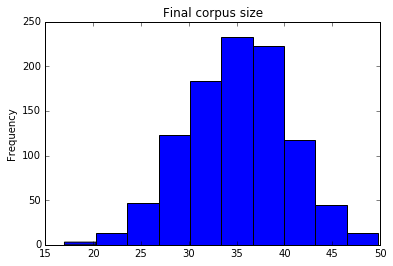

In [7]:
data["Final corpus size (Rs L)"].plot(kind = "hist", title = "Final corpus size")
plt.show()

We have data from 1000 different people in this dataset. The final corpus size seems to show some variability in the data, centred around 35 lakh rupees. The lowest and highest values in the data seem to be around 15 lakh and 55 lakh respectively. 

Similarly, we can explore the other two columns.

In [8]:
data["Monthly investment size (Rs k)"].head()

0    12.6
1     8.7
2    10.7
3    11.7
4    10.1
Name: Monthly investment size (Rs k), dtype: float64

In [9]:
data["Years worked"].head()

0    15.5
1    16.1
2    15.1
3    10.2
4    17.1
Name: Years worked, dtype: float64

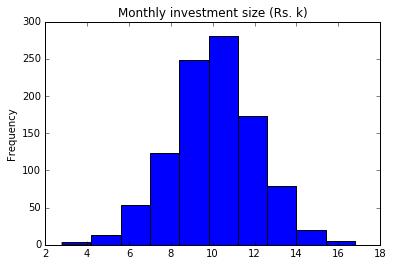

In [32]:
data["Monthly investment size (Rs k)"].plot(kind = "hist", title ="Monthly investment size (Rs. k)")
plt.show()

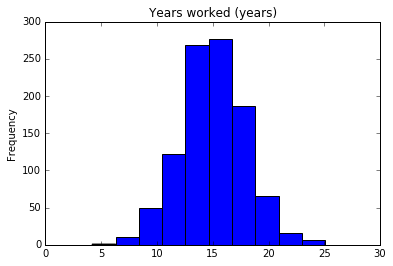

In [33]:
data["Years worked"].plot(kind = "hist", title="Years worked (years)")
plt.show()

## Understanding the business problem

Looking at the data set here, we want to understand the final corpus size, and how the Monthly investment size and the number of years worked influence it. 

* The result (final corpus size) cannot be calculated as a direct mathematical formula because of the variability in the investment patterns and personal choices of the corpus holders. 
* For these kinds of situations, MLR provides a good statistical alternative.
* We can formulate the problem as a multiple linear regression, where the monthly investment size (Rs k) and the years worked are factors, and the final corpus size is the response



In [34]:
#Tuple based multiple assignment from data frames
x1,x2,y = data['Years worked'], data['Monthly investment size (Rs k)'], data['Final corpus size (Rs L)']

Since we have 2 independent variables and one dependent variable in our problem, we can construct a 3D plot to understand the spread of the data.

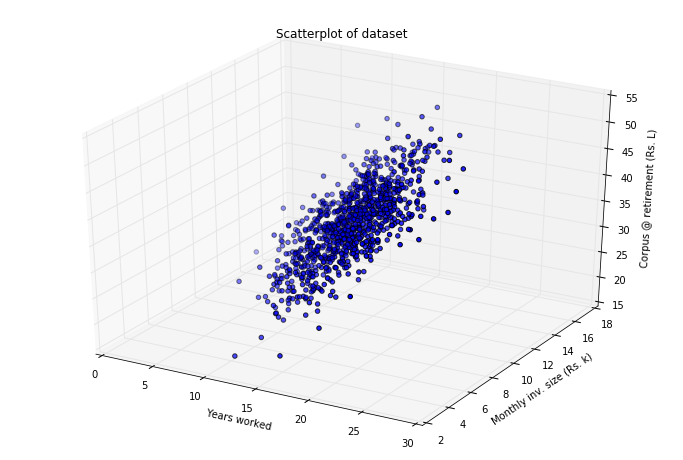

   Final corpus size (Rs L)  Monthly investment size (Rs k)  Years worked
0                      39.2                            12.6          15.5
1                      33.3                             8.7          16.1
2                      33.7                            10.7          15.1
3                      35.2                            11.7          10.2
4                      34.4                            10.1          17.1


In [58]:
#preparing a 3D plot using mplot3d within Matplotlib toolkits
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,y)
ax.set_title("Scatterplot of dataset")
ax.set_xlabel("Years worked")
ax.set_ylabel("Monthly inv. size (Rs. k)")
ax.set_zlabel("Corpus @ retirement (Rs. L)")
plt.show()
print data.head()

Observe that the data has been distributed along some kind of plane in the 3D space constructed by the two X variables and the one y variable. This means that the points in the graph can be modelled as a plane, which is a function of the two variables (Monthly investment size and years worked).

$$ y = m_1 x_1 + m_2 x_2 + c $$

Where:
* $y$ = Final corpus size (lakhs)
* $x_1$ = Years worked
* $x_2$ = Monthly investment size

Further, $m_1$ and $m_2$ are constants that indicate the slope of the plane along those two different directions.



### Multiple Regression notes:

* When y is based on 2 variables, we can model it as a surface in 3 dimensions.
* When y is based on 3 or more variables, we model it as a hyper surface in n-dimensions
* Since it is difficult to visualize these higher dimensional surfaces, we study the order and coefficients of the model

In [38]:
%matplotlib inline

X = pd.DataFrame({"Years": data["Years worked"], 
                  "Monthly inv. size (Rs. k)": data["Monthly investment size (Rs k)"]})
y = data['Final corpus size (Rs L)']

Now that we have the X and y variables defined for this model, we can divide the dataset into training and testing sets.

In [39]:
from sklearn.cross_validation import train_test_split

xtr, xts, ytr, yts = train_test_split(X,y, random_state = 5, test_size = 0.20)

We can get an idea of the data present in the data set by looking at the head of the data in each case (demonstrated for training set below).

In [16]:
print "X training set: \n\n", xtr.head(), "\n\n y training set: \n\n", ytr.head()

X training set: 

     Monthly inv. size (Rs. k)  Years
40                         5.4   14.9
977                       11.6   12.6
829                        7.0   17.1
973                        8.3   10.9
874                       11.4   14.9 

 y training set: 

40     26.8
977    32.4
829    29.8
973    26.7
874    37.9
Name: Final corpus size (Rs L), dtype: float64


## Creating a linear model

In [40]:
from sklearn.linear_model import LinearRegression

mlinreg = LinearRegression()

mlinreg.fit(xtr,ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In the above step, a linear regression model was created in much the same way we would do this for simple linear regression with one independent and one dependent variable. The LinearRegression() object contains methods such as fit(), predict() and score(), which can be used for understanding the model and the results.

## Scoring the linear model

In [18]:
print "Score based on training data: ", mlinreg.score(xtr,ytr)

print "Score based on test data: ", mlinreg.score(xts,yts)


Score based on training data:  0.850253841743
Score based on test data:  0.879357430843


The same scores can also be calculated using the sklearn.metrics $R^2$ function. The function takes two arguments, the true Y values and the predicted Y values. We can attempt to calculate this below for the training and testing sets.

In [19]:
from sklearn.metrics import r2_score

In [20]:
print "R^2 from training set: " , r2_score(ytr, mlinreg.predict(xtr))
print "R^2 from testing set: ", r2_score(yts, mlinreg.predict(xts))

R^2 from training set:  0.850253841743
R^2 from testing set:  0.879357430843


## k-Fold Cross Validation

K-fold cross validation is an approach in which, instead of dividing the data set into only 2 (train and test) parts, we divide it into k parts (k generally ranges from 3 to 10, depending on the size of the data set). We can then perform cross validation combinatorially, between every two pair of "folds". Hence the name k-fold CV.

In [21]:
from sklearn.cross_validation import cross_val_score

Now we will implement a cross validation using 5 folds. This will divide the dataset into five parts. Each time, it will hold one part and run the algorithm (in this case designated as "mlinreg" ) with the other 4 parts. This is repeated five times, and results in five cross validation scores.

These CV values can then be averaged to get an idea of the typical model performance for the data. Further, the model performance can be understood better than if we were to do a simple holding cross validation ($R^2$ score).

### Three fold cross validation

In [22]:
scores = cross_val_score(mlinreg, xtr, ytr, cv = 3)
print "Cross validation scores for each fold: ", scores
print "Cross validation score averaged over all folds", np.mean(scores)

Cross validation scores for each fold:  [ 0.81577292  0.85334756  0.87396849]
Cross validation score averaged over all folds 0.847696322326


### Five fold cross validation

In [23]:
scores = cross_val_score(mlinreg, xtr, ytr, cv = 5)
print "Cross validation scores for each fold: ", scores
print "Cross validation score averaged over all folds", np.mean(scores)

Cross validation scores for each fold:  [ 0.82692842  0.80578889  0.86886287  0.86074394  0.86996769]
Cross validation score averaged over all folds 0.846458362461


### Ten fold cross validation

In [24]:
scores = cross_val_score(mlinreg, xtr, ytr, cv = 10)
print "Cross validation scores for each fold: ", scores
print "Cross validation score averaged over all folds", np.mean(scores)

Cross validation scores for each fold:  [ 0.82806296  0.82454433  0.77682278  0.82842734  0.85462423  0.88154601
  0.83401818  0.88768841  0.90037102  0.83081323]
Cross validation score averaged over all folds 0.844691849642


When the number of folds is greater, there is a smaller number of points in each fold. This means that we need more data, when we do cross validation with many folds. With large data sets, it is recommended to do 10 fold cross validation, but the number of folds can be decided based on computational cost, and the data available. 

The set of k scores for cross validation against each fold, and the average of those values are given above.

## Making sense of the CV results

Earlier we discussed how the coefficients and intercepts of the linear model can be used to draw a surface of best fit in 3 dimensions, that can explain the data. Now we will see how this can be done in Python. We can use this as a decision surface for helping us estimate the corpus, given some specific case.

* $R^2$ values tend to indicate goodness of fit for a regression function. The greater the value, the better.
* Cross validation done over k-folds provides a more conservative estimate of goodness of fit. Again, the greater the $R^2$ value, the better.
* Below, we can evaluate the coefficients created due to the model.
    * The coef\_ array stored within the model gives us the coefficients of each item
    * The intercept\_ value stores the intercept of the decision plane with the y axis - since in this case the equation is $y = f(x_1,x_2)$  


In [25]:
print "Coefficient for Monthly inv size (k) : \t", mlinreg.coef_[0], "\nCoefficient for Years worked: \t\t", mlinreg.coef_[1]

Coefficient for Monthly inv size (k) : 	2.0190171777 
Coefficient for Years worked: 		1.00710383216


In [26]:
print "Intercept of the plane on the corpus axis: ", mlinreg.intercept_
q = mlinreg.intercept_ 

Intercept of the plane on the corpus axis:  -0.364102619178


Based on the above data, we can construct a plane with the following equation that can explain the behaviour in the data.

$$y = 2.02x_1 + 1.01x_2 - 0.36$$

Where:
* $x_1$ = Monthly investment size (Rs. k)
* $x_2$ = Years worked
* $y$ = Corpus at retirement (Rs. L)

**Note**: The equation shown in $\LaTeX$ above may change if you have a different input file (mlr.csv) in this particular case.


## Visualizing the Regression Plane

Based on the values of coefficients and intercepts, a plane can be used to describe the data. The approach followed here is as follows:
* Decide on a grid or resolution size
* Construct a grid of x1 and x2 coordinates
* Calculate the y values at all points along this grid
* Visualize the dataset along with the plane formed from the (x1,x2,y) tuples



In [27]:
gridsize = 10
years = np.linspace(3.0,25.0,gridsize)
monthly = np.linspace(2.0,20.0,gridsize)

After setting the grid size and creating a set of points of both independent variables, we can now compute the grid tuples as below.

In [28]:
from itertools import product
cases = list(product(monthly,years))
cases = pd.DataFrame(cases)
cases.columns = ["monthly","years"]

Next, we pass the test cases to the predict() method. This will give us the values of $y$ for different values of $(x_1,x_2)$.

In [29]:
yvals = mlinreg.predict(cases)

## 3D Plotting in Matplotlib

Matplotlib has a toolkit meant for 3D plotting. Although it is verbose, it does the job pretty well for even large sets of data. In this case, we create an object called fig, and add a subplot to it. The subplot will contain a number of plots - actual data sets which are overlayed on the data.

By using the model, and by plotting the data, we can now see how well the data fits the model.

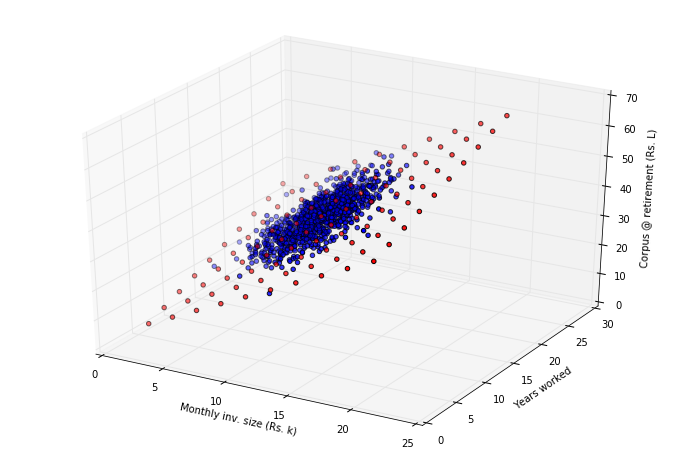

In [52]:
%matplotlib inline
#preparing a 3D plot using mplot3d within Matplotlib toolkits
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(cases['monthly'],cases["years"],yvals, c="r")
ax.scatter3D(X['Monthly inv. size (Rs. k)'], X['Years'], y)
ax.set_xlabel("Monthly inv. size (Rs. k)")
ax.set_ylabel("Years worked")
ax.set_zlabel("Corpus @ retirement (Rs. L)")
plt.show()

## Sandbox

This is a space to experiment with different plot types within Matplotlib 3D plot.

We can interact with the plot here and rotate views, etc. 

In [43]:
%matplotlib qt
#preparing a 3D plot using mplot3d within Matplotlib toolkits
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(cases["monthly"],cases['years'],yvals, c="r")
ax.scatter3D(X['Monthly inv. size (Rs. k)'], X['Years'], y)
ax.set_xlabel("Monthly inv. size (Rs. k)")
ax.set_ylabel("Years worked")
ax.set_zlabel("Corpus @ retirement (Rs. L)")
plt.show()